In [2]:
import cv2
import matplotlib.pyplot as plt

##### Load the RGB image baboon.png.

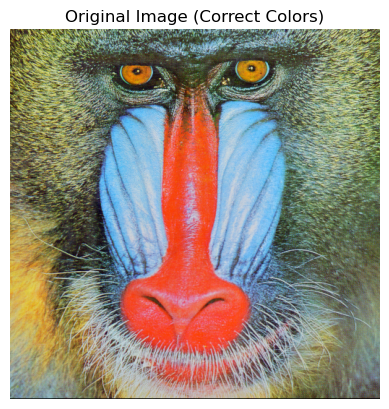

In [11]:
img_bgr = cv2.imread(r"C:\Users\bbuser\Downloads\baboon.png")

if img_bgr is None:
    print("Image not found! Please check the path.")
else:
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)  
    plt.imshow(img_rgb)
    plt.title("Original Image (Correct Colors)")
    plt.axis('off')
    plt.show()

##### Create and display histograms for each color channel (Red, Green, Blue).

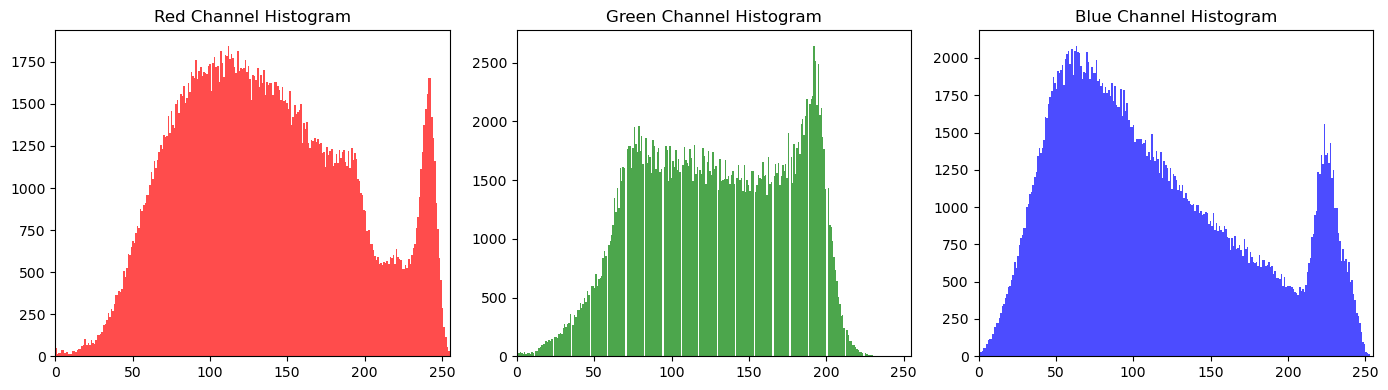

In [13]:
colors = ['Red', 'Green', 'Blue']

plt.figure(figsize=(14, 4))

for i, color in enumerate(colors):
    plt.subplot(1, 3, i+1)
    plt.hist(img_rgb[:, :, i].ravel(), bins=256, color=color.lower(), alpha=0.7)
    plt.title(f"{color} Channel Histogram")
    plt.xlim([0, 255])

plt.tight_layout()
plt.show()

##### Apply intensity transformations to enhance image contrast and brightness.

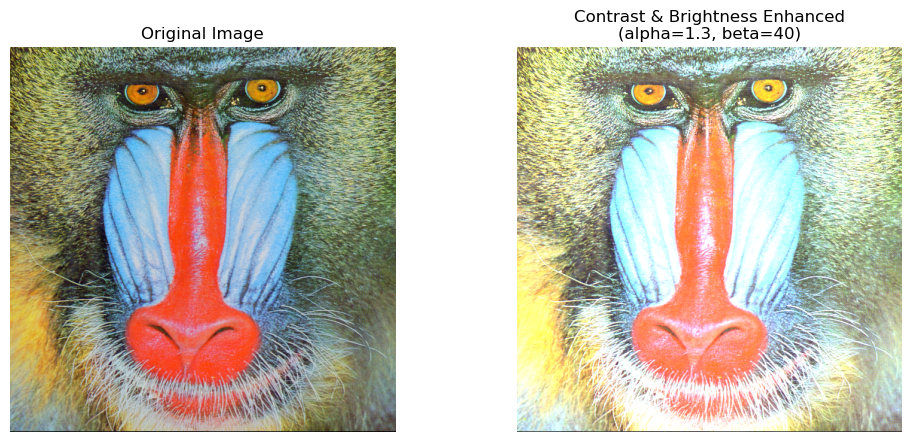

In [14]:
alpha = 1.3
beta = 40

img_transformed = cv2.convertScaleAbs(img_rgb, alpha=alpha, beta=beta)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_transformed)
plt.title(f"Contrast & Brightness Enhanced\n(alpha={alpha}, beta={beta})")
plt.axis('off')

plt.show()

##### Adjust brightness and contrast with chosen transformation functions.

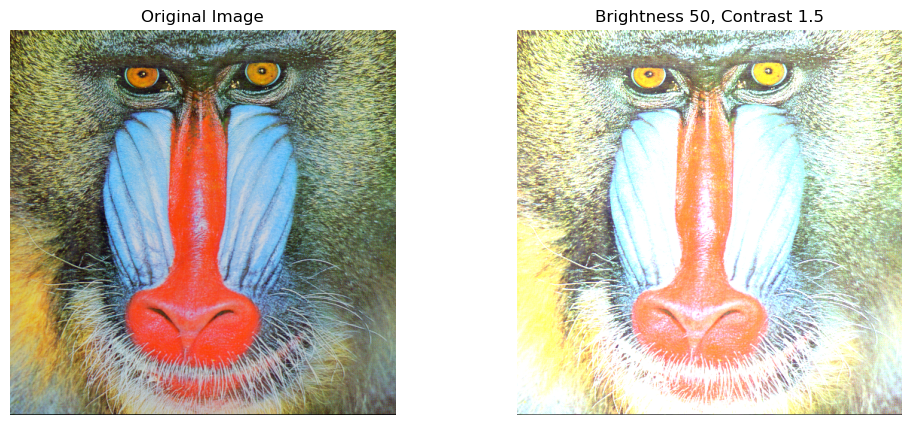

In [16]:
def adjust_brightness_contrast(image, brightness=0, contrast=1.0):
    return cv2.convertScaleAbs(image, alpha=contrast, beta=brightness)

brightness = 50
contrast = 1.5

img_adjusted = adjust_brightness_contrast(img_rgb, brightness, contrast)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_adjusted)
plt.title(f"Brightness {brightness}, Contrast {contrast}")
plt.axis('off')

plt.show()

##### Perform histogram equalization on each channel.

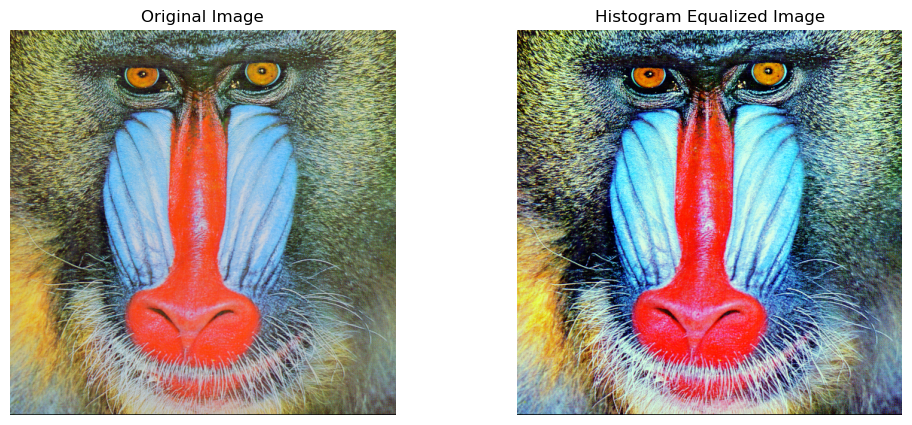

In [17]:
r, g, b = cv2.split(img_rgb)
r_eq = cv2.equalizeHist(r)
g_eq = cv2.equalizeHist(g)
b_eq = cv2.equalizeHist(b)
img_eq = cv2.merge((r_eq, g_eq, b_eq))

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_eq)
plt.title("Histogram Equalized Image")
plt.axis('off')

plt.show()

##### Convert the image to grayscale and create its histogram.

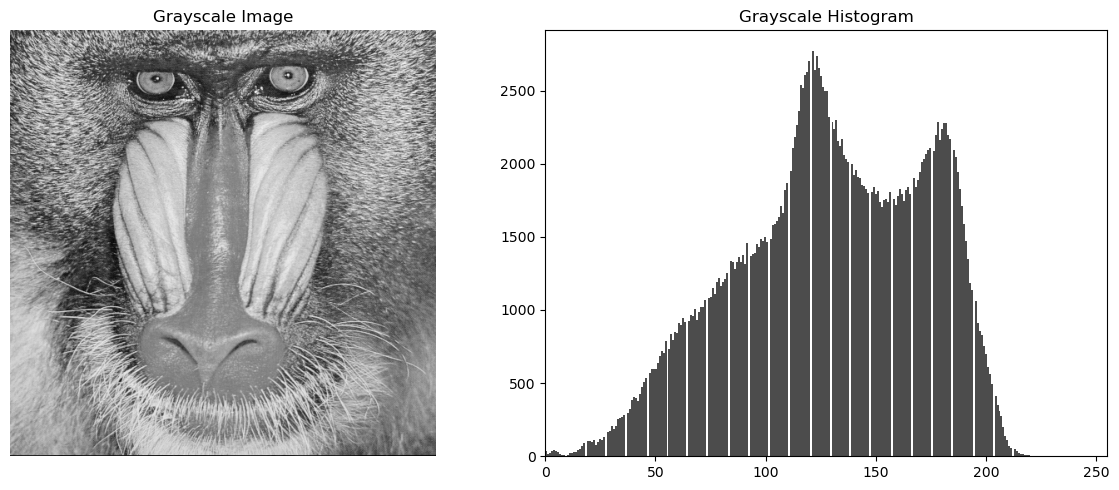

In [23]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.hist(img_gray.ravel(), bins=256, color='black', alpha=0.7)
plt.title("Grayscale Histogram")
plt.xlim([0, 255])
plt.tight_layout()

plt.show()

##### Apply Otsu’s thresholding to segment objects from the grayscale image.

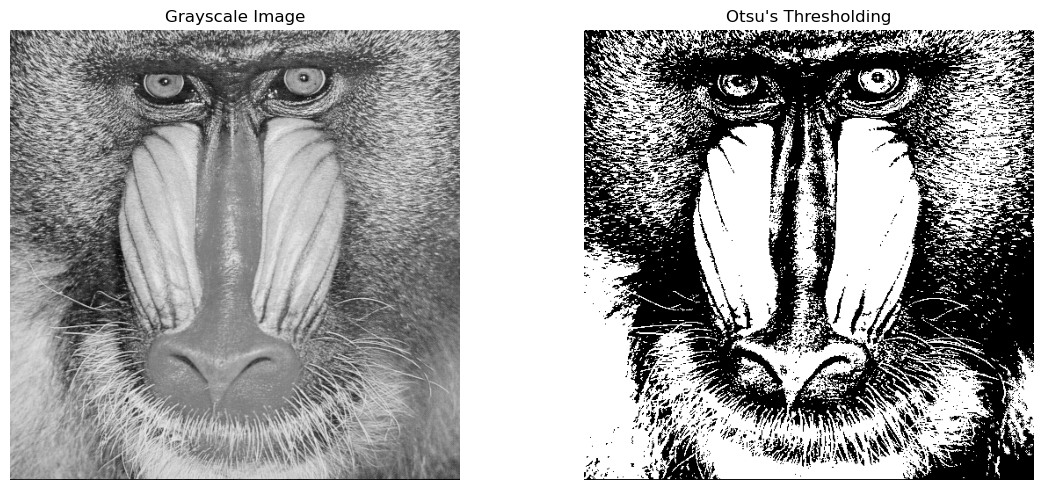

In [24]:
_, otsu_thresh = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_gray, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(otsu_thresh, cmap='gray')
plt.title("Otsu's Thresholding")
plt.axis('off')

plt.tight_layout()
plt.show()